In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the dataset
data = pd.read_csv('Virtual_Reality_in_Education_Impact.csv')

# Select features and target
features = ['Age', 'Hours_of_VR_Usage_Per_Week', 'Perceived_Effectiveness_of_VR']
target = 'Engagement_Level'

# Drop rows with missing values in the selected columns
data_cleaned = data.dropna(subset=features + [target])

# Separate features and target variable
X = data_cleaned[features]
y = data_cleaned[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'vr_engagement_model.pkl')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the performance metrics
print("Model Performance:")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Model Performance:
Root Mean Squared Error (RMSE): 1.4304850911738651
R-squared (R2): -0.001868617018651042


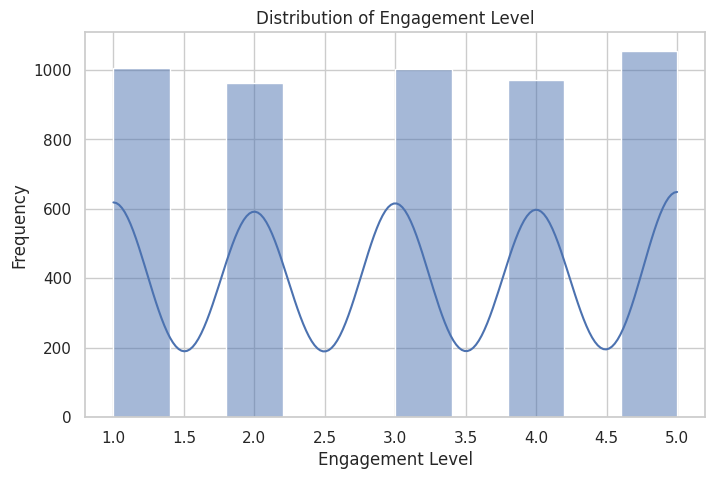

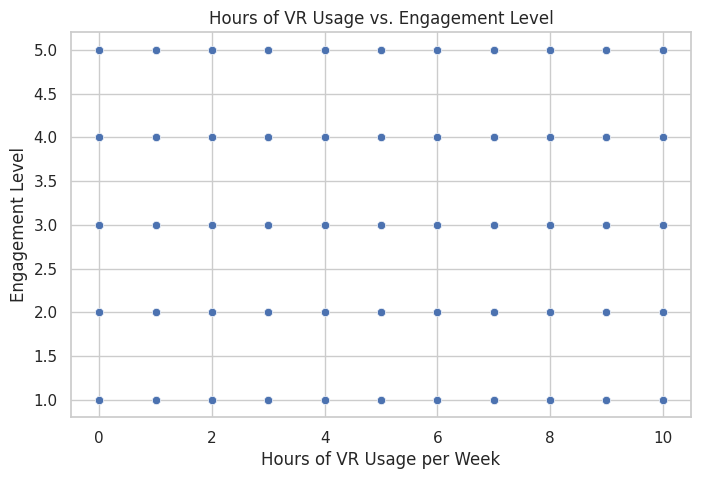

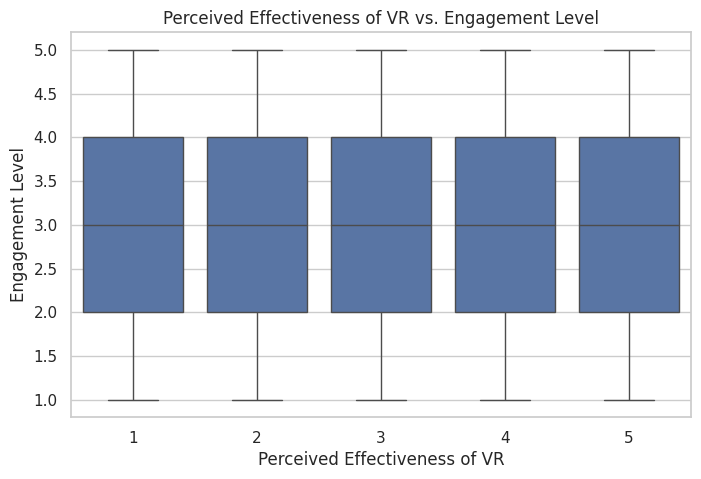

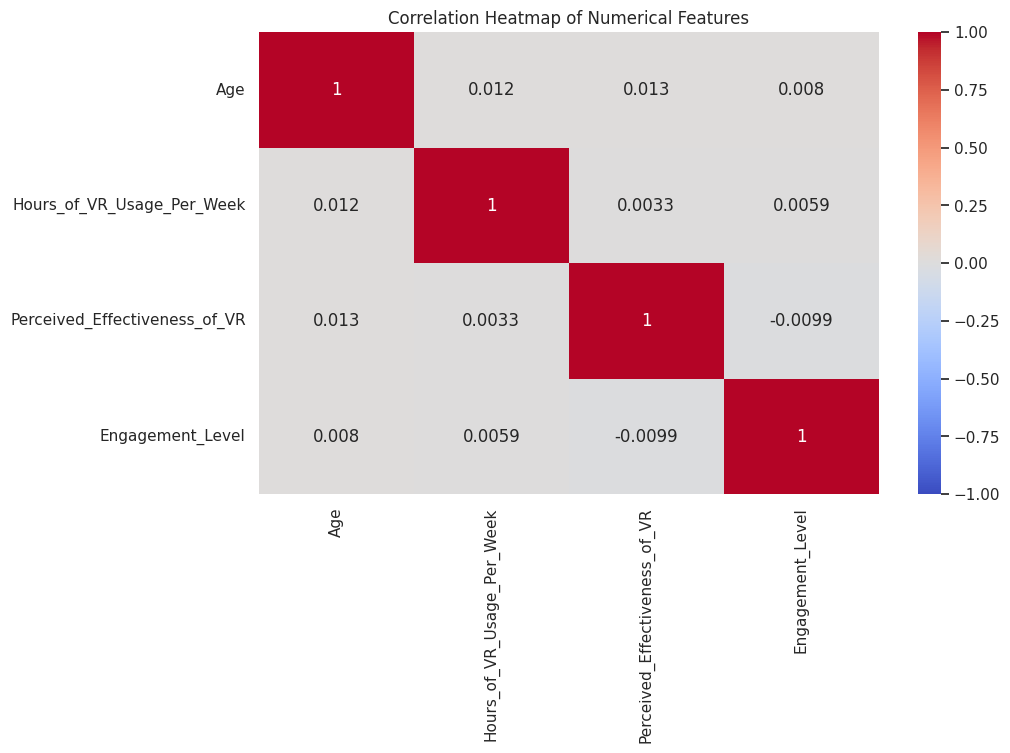

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# 1. Distribution of Engagement Level
plt.figure(figsize=(8, 5))
sns.histplot(data['Engagement_Level'], bins=10, kde=True)
plt.title("Distribution of Engagement Level")
plt.xlabel("Engagement Level")
plt.ylabel("Frequency")
plt.show()

# 2. Relationship between Hours of VR Usage and Engagement Level
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Hours_of_VR_Usage_Per_Week', y='Engagement_Level', data=data)
plt.title("Hours of VR Usage vs. Engagement Level")
plt.xlabel("Hours of VR Usage per Week")
plt.ylabel("Engagement Level")
plt.show()

# 3. Relationship between Perceived Effectiveness of VR and Engagement Level
plt.figure(figsize=(8, 5))
sns.boxplot(x='Perceived_Effectiveness_of_VR', y='Engagement_Level', data=data)
plt.title("Perceived Effectiveness of VR vs. Engagement Level")
plt.xlabel("Perceived Effectiveness of VR")
plt.ylabel("Engagement Level")
plt.show()

# 4. Correlation Heatmap of Numerical Features
plt.figure(figsize=(10, 6))
numerical_features = data[['Age', 'Hours_of_VR_Usage_Per_Week', 'Perceived_Effectiveness_of_VR', 'Engagement_Level']]
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [13]:
pip install flask

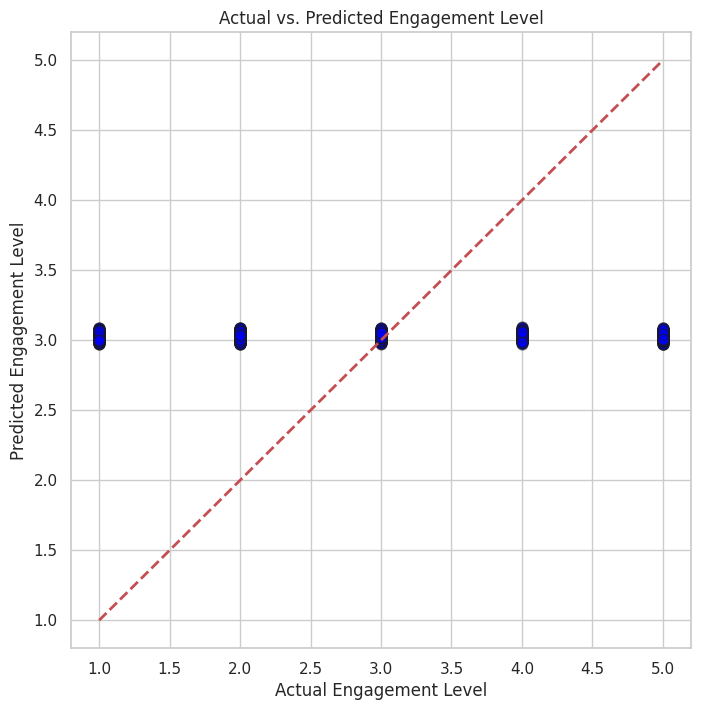

In [4]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions using the model
y_pred = model.predict(X_test)

# Set plot style
sns.set(style="whitegrid")

# Plot actual vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6, s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # line y=x for reference
plt.title("Actual vs. Predicted Engagement Level")
plt.xlabel("Actual Engagement Level")
plt.ylabel("Predicted Engagement Level")
plt.show()

In [9]:
import pickle
from sklearn.preprocessing import LabelEncoder

# Training steps (assume data preparation and training are done)
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

# Save the label encoders
label_encoders = {}
# Ensure categorical_columns are in your dataset
categorical_columns = ['Gender', 'Grade_Level', 'Field_of_Study', 'Usage_of_VR_in_Education']
#Remove ... from the list, as it's not a valid column name.

#Adjust X_train to include categorical features if they are needed for prediction
#Assuming data_cleaned contains all your features (including categorical)
X_train, X_test, y_train, y_test = train_test_split(data_cleaned[features + categorical_columns], y, test_size=0.2, random_state=42)
# features + categorical_columns makes sure you are including all columns


for column in categorical_columns:
    le = LabelEncoder()
    # Now X_train should contain the column
    X_train[column] = le.fit_transform(X_train[column])
    label_encoders[column] = le

with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

In [10]:
# Load trained model and encoders
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

with open("label_encoders.pkl", "rb") as f:
    label_encoders = pickle.load(f)


In [14]:
from flask import Flask, request, jsonify
import pickle
import pandas as pd

# Initialize Flask app
app = Flask(__name__)

# Load trained model and encoders
with open("model.pkl", "rb") as f:
    model = pickle.load(f)

with open("label_encoders.pkl", "rb") as f:
    label_encoders = pickle.load(f)

# Define a prediction route
@app.route('/predict', methods=['POST'])
def predict():
    # Get JSON data from request
    data = request.get_json()

    # Convert JSON to DataFrame for easy processing
    df = pd.DataFrame([data])

    # Encode categorical features
    for column, encoder in label_encoders.items():
        if column in df.columns:
            df[column] = encoder.transform(df[column])

    # Make prediction
    prediction = model.predict(df)[0]

    # Send prediction as response
    return jsonify({'Engagement_Level_Prediction': prediction})

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [16]:
app.run(debug=True, port=5001)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5001
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [17]:
app.run(debug=True, host='0.0.0.0')


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


In [19]:
!curl -X POST http://localhost:5000/predict -H "Content-Type: application/json" -d '{"feature1": "value1", "feature2": "value2"}'

curl: (7) Failed to connect to localhost port 5000 after 0 ms: Connection refused


In [21]:
!python your_flask_app.py

python3: can't open file '/content/your_flask_app.py': [Errno 2] No such file or directory
